# Performance Evaluation

# Strategy return analysis

In [19]:
#########
# Setup
#########
import pandas as pd
import bt
import talib

%matplotlib inline

import matplotlib.pyplot as plt

In [25]:
# get data
bt_data = bt.get('goog, amzn, tsla',
                 start='2016-1-1') # end = current date by default

# Create strategy
bt_strategy = bt.Strategy('Trade_Weekly', # name assignemnt to strategy
                         [bt.algos.RunWeekly(), # Run weekly
                          bt.algos.SelectAll(), # Use all data
                          bt.algos.WeighEqually(), # Maintain equal weights
                          bt.algos.Rebalance()]) # Rebalance

# create a backtest
bt_test = bt.Backtest(bt_strategy, bt_data)

# run the backtest
bt_results = bt.run(bt_test)

C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\alimi\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


## Obtain detailed backtest stats
In previous lessons we have built and backtested several trading strategies and visualized the strategy performance. Now let's look into the details of the backtest statistics. Suppose we have a strategy backtest result saved in bt_result. We can obtain all **backtest statistics by calling  bt_results.stats** and saving it in a DataFrame. The DataFrame is indexed by various performance metrics. There is a lot of information here, so let's focus on several important ones.

In [26]:
result_info = bt_results.stats
result_info.index

Index(['start', 'end', 'rf', 'total_return', 'cagr', 'max_drawdown', 'calmar',
       'mtd', 'three_month', 'six_month', 'ytd', 'one_year', 'three_year',
       'five_year', 'ten_year', 'incep', 'daily_sharpe', 'daily_sortino',
       'daily_mean', 'daily_vol', 'daily_skew', 'daily_kurt', 'best_day',
       'worst_day', 'monthly_sharpe', 'monthly_sortino', 'monthly_mean',
       'monthly_vol', 'monthly_skew', 'monthly_kurt', 'best_month',
       'worst_month', 'yearly_sharpe', 'yearly_sortino', 'yearly_mean',
       'yearly_vol', 'yearly_skew', 'yearly_kurt', 'best_year', 'worst_year',
       'avg_drawdown', 'avg_drawdown_days', 'avg_up_month', 'avg_down_month',
       'win_year_perc', 'twelve_month_win_perc'],
      dtype='object')

## Strategy returns
The most basic metric for strategy performance evaluation is the **rate of return**. A rate of return is the **net gain or loss of a portfolio or asset over a specified time period**, for example daily, monthly, or yearly. To obtain the rate of return for different time periods, we can slice the stats dataframe result_info by the metric names. For example, use **daily_mean**, **monthly_mean and yearly_mean** to get the daily, monthly, and annual return respectively. In the code, we format the output to be float numbers with 4 decimal points using the expression after the percentage sign operator. In the output, for example, the daily return is shown as point 1966 or 19 point 66 percent.

___
$
Return = \frac{V{e} - V{b}}{V{b}}
$


$V_{e}$: ending value 
$V_{b}$: beginning value

___

In [27]:
print('Daily return: %.4f'% result_info.loc['daily_mean'])
print('Monthly return: %.4f'% result_info.loc['monthly_mean'])
print('Yearly return: %.4f'% result_info.loc['yearly_mean'])

Daily return: 0.4230
Monthly return: 0.4421
Yearly return: 0.5897


## Compound annual growth rate
Another useful return metric is called **compound annual growth rate**, or **CAGR**. It is the rate of return that would be required for an asset or trading account to grow from its beginning balance to its ending balance, assuming all the profits were reinvested at the end of each year. For example, an asset may increase in value by 8% in one year, decrease in value by 3% the following year and increase in value by 5% in the next. **CAGR helps smooth returns when growth rates are expected to be volatile and inconsistent**. It also makes different alternative results easier to compare. We can obtain the CAGR by slicing the stats DataFrame with the name cagr.

___
$
CAGR = \frac{V_{f}}{V_{i}}^{\frac{1}{n}} - 1
$
___
$V_{f}$: final value <br>
$V_{i}$ : initial value<br>
**n**:     number of years <br>
___

In [28]:
# get CAGR
print('CAGR: %.4f'% result_info.loc['cagr'])

CAGR: 0.4562


## Plot return histogram
We can plot the return histogram to check the distribution of returns. This is easily done by calling plot underscore histograms on bt underscore result. Use the freq argument to specify the return frequencies to be plotted, for example w for weekly. By default it will plot a histogram based on daily returns.

<Figure size 432x288 with 0 Axes>

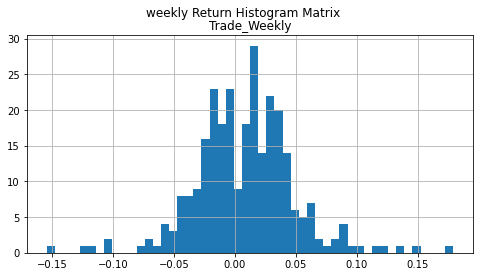

In [29]:
bt_results.plot_histograms(bins=50, freq='w',figsize=(8,4))
plt.show()

## Compare strategy lookback returns
In addition, we can compare the return results of multiple strategies side by side. Suppose we have run a strategy optimization and have two backtest results saved in bt underscore results. Call display underscore lookback underscore returns on it, and we can compare the lookback returns of both strategies.

In [30]:
# Get lookback reuturns
lookback_returns = bt_results.display_lookback_returns()
lookback_returns

,Trade_Weekly
mtd,-6.20%
3m,5.94%
6m,15.52%
ytd,8.52%
1y,122.61%
3y,63.56%
5y,48.53%
10y,nan%
incep,45.62%


# Drawdown

## What is a drawdown?
A drawdown is a **peak-to-trough decline during a specific period** for an asset or a trading account. A drawdown is usually quoted as the percentage between the peak and the subsequent trough. If a trading account has 1000 in it, and the fund drops to 900 before moving back above 1000, then the trading account has experienced a 10% drawdown. **Drawdowns are a measure of downside volatility.**

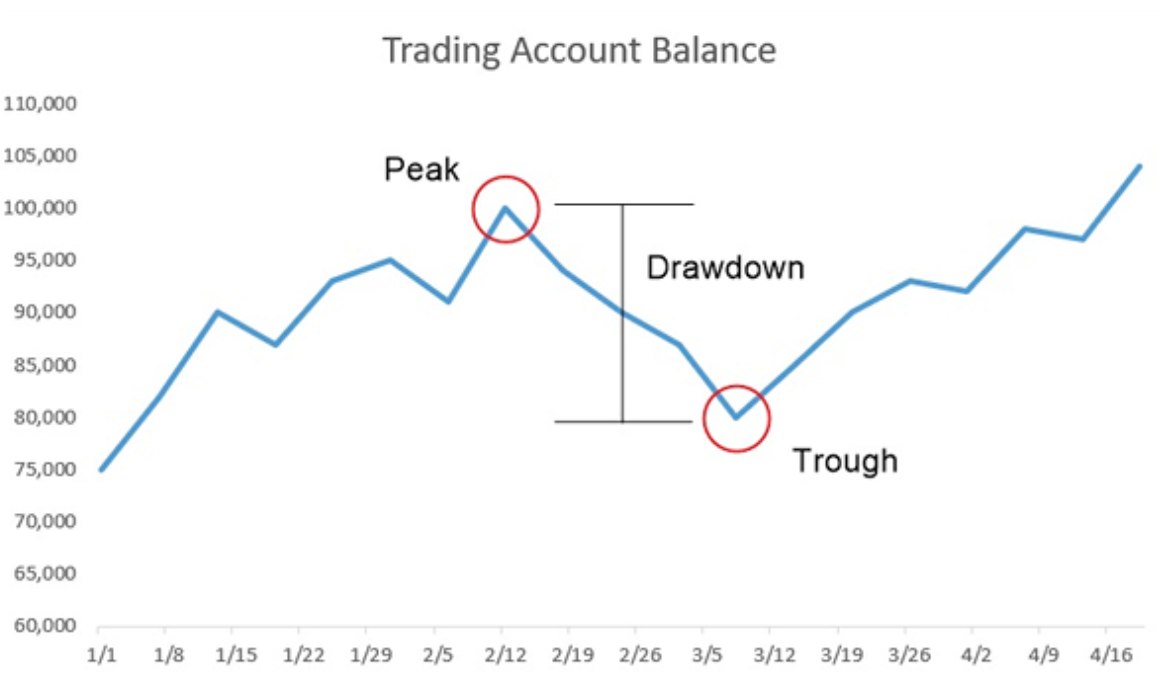

## Max drawdown
A max drawdown is the **maximum observed loss from a peak to a trough** of an account, before a new peak is established. Max drawdown is an indicator of downside risk over a specified time period. For example, if an account begins with a value of 1000, increases in value to 1700 (point A), decreases to 900 (point B), increases to 1400 (point C), then decreases to 800 (point D), then increases to 2000 (point E), the max drawdown is 1700 (at point A) minus 800 (at point D) then divided by 1700, or about 53%.

## Obtain drawdowns from backtest stats
We can get various types of drawdown results, such as max drawdown, average drawdown, and average drawdown days from the stats DataFrame as the sample code demonstrates. The average drawdown is the mean drawdown percentage during the strategy backtest period, and the average drawdown days equals the number of days on average that the portfolio or account would remain in a drawdown period.

## The Calmar ratio
The Calmar ratio was created by a hedge fund manager named Terry Young and first published in 1991. The name Calmar is an acronym of Young's company name and its newsletter: California Managed Accounts Report. Calmar ratio is calculated as a portfolio or account's compounded annual growth rate, or CAGR, divided by its max drawdown. People also refer to the Calmar ratio as the drawdown ratio. Since the max drawdown is a measure of downside risk, the higher the Calmar ratio, the better a strategy performed on a risk-adjusted basis during the given timeframe. As a rule of thumb a Calmar ratio larger than 3 is considered excellent.

## Calculate the Calmar ratio manually
We can calculate the Calmar ratio manually using stats from the backtest result. As the sample code demonstrates, the Calmar ratio equals the CAGR divided by the max drawdown, both are available by slicing the stats DataFrame. Doing so can give us an intuitive understanding of how the Calmar ratio is obtained. Also note the max drawdown is multiplied by minus 1 during the calculation to convert the result to a positive number. It is formatted to print a float number with 2 decimal points.

## Obtain the Calmar ratio from backtest stats
We can also get the Calmar ratio directly from the backtest result stats by referring to the name calmar.